In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
from colorama import Fore, Back, Style
import sympy as sym

plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

### Problem 7: Use MATLAB/Python (CLO-3)

Expectation of R^2:  1.0930346114096117


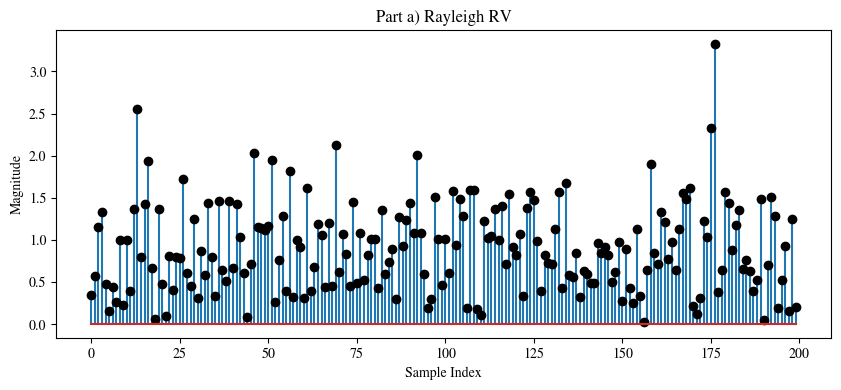

In [2]:
"""
a) Generate 200 samples of a Rayleigh random variable R with E{R^2}=1. Plot the samples in a stem plot. Remember that R = |X+jY|, where X and Y are zero mean, independent Gaussian random variables (r.v). Your Gaussian r.v. X and Y (produced by randn command) must each have equal variance equal to ½. 
b) Give the estimated rms value of R, based on the 200 samples generated, which is given as √(bar(R^2)).
c) What fraction (if any) of these Rayleigh samples are 10dB below the estimated rms value?(Note that this threshold corresponds to rho=-10dB in the context of level crossing)
d) Generate 200 samples of a Rician random variable by adding means mr=5cos(π/3) and mi = 5sin(π/3), respectively to the real part (X) and imaginary part (Y) in part (a). Plot the samples in stem plot. What is the K factor of this Rician random variable?
e) Repeat part (d) except use mr=5cos(π/6) and mi = 5sin(π/6). Plot the samples in stem plot. What is the effect of phase change on the appearance of stem plot?
f) We now normalize the Rician random variables to have unit mean square value. Let Rn be the nth sample from Part (d). Make 200 normalized r.v. as W_n=R_n/√(bar(R^2)). Plot the Wn's as a stem plot and compare it to Part (a). What fraction of samples of W are 10dB below the rms value of W (should be fewer, because there should be less fading).
"""

# a)
N = 200
var = 1 / 2
rv_rayleigh = np.random.normal(
    loc=0, scale=np.sqrt(var), size=N
) + 1j * np.random.normal(loc=0, scale=np.sqrt(var), size=N)
samples_rayleigh = np.abs(rv_rayleigh)

# Verify E{R^2}=1
print("Expectation of R^2: ", np.mean(samples_rayleigh**2))

# Stem plot
plt.figure(figsize=(10, 4))
plt.stem(samples_rayleigh, markerfmt="black")
plt.xlabel("Sample Index")
plt.ylabel("Magnitude")
plt.title("Part a) Rayleigh RV")
plt.show()

In [3]:
# b)
rms_rayleigh = np.sqrt(np.mean(samples_rayleigh**2))
print("RMS value of R: ", rms_rayleigh)

RMS value of R:  1.045482956058879


In [8]:
np.mean(samples_rayleigh), np.mean(samples_rician)

(0.9031521736160565, 6.884643048012457)

In [4]:
# c)
def pow2db(x):
    return 10 * np.log10(x)

fraction = np.sum(pow2db(samples_rayleigh) < pow2db(rms_rayleigh) - 10) / N
print("Fraction of Rayleigh Samples 10dB less than Estimated RMS: ", fraction)

Fraction of Rayleigh Samples 10dB less than Estimated RMS:  0.03


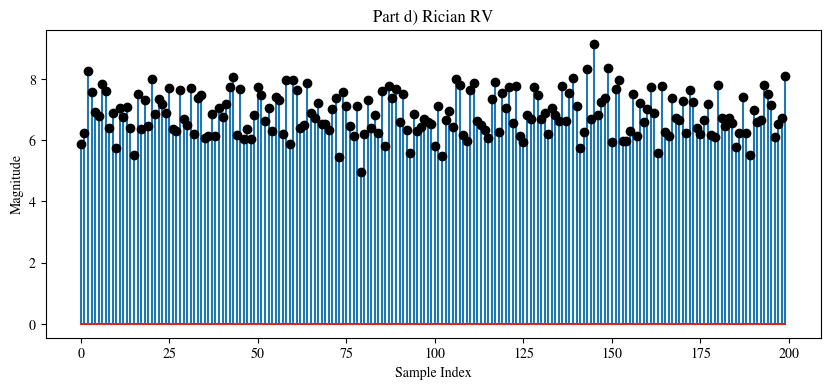

K Factor:  25.265071083129033 dB


In [5]:
# d)
mr = 5 * math.cos(np.pi / 3)
mi = 5 * math.sin(np.pi / 3)
rv_rician = (mr + np.random.normal(loc=0, scale=np.sqrt(var), size=N)) + (
    1j * np.random.normal(loc=0, scale=np.sqrt(var), size=N) + mi
)
samples_rician = np.abs(rv_rician)

# Stem plot
plt.figure(figsize=(10, 4))
plt.stem(samples_rician, markerfmt="black")
plt.xlabel("Sample Index")
plt.ylabel("Magnitude")
plt.title("Part d) Rician RV")
plt.show()

# K Factor
K = np.abs(mr + 1j * mi) ** 2 / (2 * np.var(samples_rician))
print("K Factor: ", K, "dB")

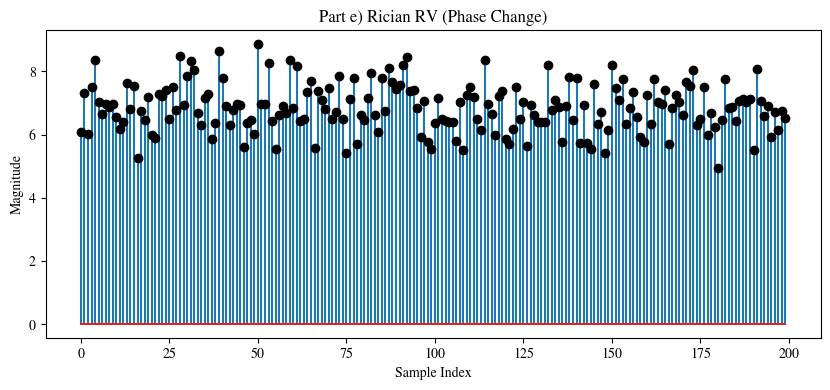

K Factor:  21.820132929440806 dB


In [6]:
# e)
mr = 5 * math.cos(np.pi / 6)
mi = 5 * math.sin(np.pi / 6)
rv_rician = (mr + np.random.normal(loc=0, scale=np.sqrt(var), size=N)) + (
    1j * np.random.normal(loc=0, scale=np.sqrt(var), size=N) + mi
)
samples_rician = np.abs(rv_rician)

# Stem plot
plt.figure(figsize=(10, 4))
plt.stem(samples_rician, markerfmt="black")
plt.xlabel("Sample Index")
plt.ylabel("Magnitude")
plt.title("Part e) Rician RV (Phase Change)")
plt.show()

# K Factor
K = np.abs(mr + 1j * mi) ** 2 / (2 * np.var(samples_rician))
print("K Factor: ", K, "dB")

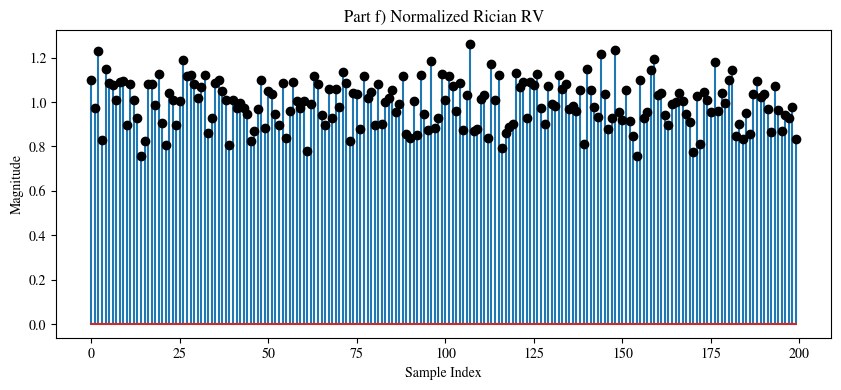

RMS value of W:  0.9999999999999999
Fraction of W Samples 10dB less than Estimated RMS:  0.0


In [7]:
# f)
mr = 5 * math.cos(np.pi / 3)
mi = 5 * math.sin(np.pi / 3)
rv_rician = (mr + np.random.normal(loc=0, scale=np.sqrt(var), size=N)) + (
    1j * np.random.normal(loc=0, scale=np.sqrt(var), size=N) + mi
)
samples_rician = np.abs(rv_rician)

Rn = samples_rician
Wn = Rn / np.sqrt(np.mean(Rn**2))

# Stem plot
plt.figure(figsize=(10, 4))
plt.stem(Wn, markerfmt="black")
plt.xlabel("Sample Index")
plt.ylabel("Magnitude")
plt.title("Part f) Normalized Rician RV")
plt.show()

# RMS
rms = np.sqrt(np.mean(Wn**2))
print("RMS value of W: ", rms)

# Fraction of samples 10dB below RMS
fraction = np.sum(pow2db(Wn) < pow2db(rms) - 10) / N
print("Fraction of W Samples 10dB less than Estimated RMS: ", fraction)